# SMU 7331 Data Mining Project 1
##### Authors: Shon Mohsin, Heber Nielsen, Jose Torres, Lokesh Maganti

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Business Understanding:

This paper is an evaluation of the dataset used in the research article _["Effects of earthquake on perinatal outcomes: A Chilean register-based study"](https://github.com/ShonTM/DataMiningProject1/blob/master/chile%20earthquake%20plos%20one%20paper.pdf)_  by Yasna K, et al. The paper looks for the effect of the February 27, 2010 earthquake that occured in Chile and the perinatal outcomes of Chilean pregnant women to determine if there was an effect of the earthquake on the outcomes. 

For this project, we visualize the dataset used and use exploratory data analysis to identify cursory meaning from the visualizations. We create summary statistics to derive high-level opportunities for further analysis. 

| Feature Name (Original)       | Feature Name (English) | Description               | Variable Type                |
| ------------- |:-------------:| ----------------------:|--------------------------:|-----------------------------:|
| id_clinica                    | Clinic_ID              | ID# of the medical clinic | numeric                      |
| id_excel                      | Excel_File_ID          | ID# in original source    |                              |
| dia                           | Day                    | Day in birth month        | numeric                      |
| mes                           | Month                  | Birth month               | numeric                      |
| ano                           | Year                   | Birth year                | numeric                      |
| sex                           | Sex                    | Birth sex (Mujer/Hombre)  | numeric                      |
| peso                          | Weight                 | Birth weight in grams| numeric                           |
| talla                         | Length                 | Birth length in cm        | numeric                      |
| cc                            | Head_circ              | Head circumference in cm (eyebrow level) | numeric       |
| apgar                         | Apgar_1                | Apgar score 1 minute after birth | numeric               |
| apgar5                        | Apgar_5                | Apgar score 5 minutes after birth | numeric              |
| comuna                        | Municipality           | Avg. annual income in Chilean Pesos | numeric            |
| aeg                           | wgt_for_age            | Weight relative to gestational age | Categorical         |
| eg                            | Gest_age               | Gestational age at birth in weeks  | numeric             |
| trim_exp                      | Trimester              | Trimester when exposure occurred   | numeric             |
| bajo_peso                     | Low_bthwgt             | Indicator for weight under 2500 grams | Categorical      |
| pretermino                    | Premature              | Indicator for gestation period less than 37 weeks | Categorical  |
| edad_mama                     | Maternal_Age           | Age of mother in years    | numeric                      |
| paridad                       | Parity                 | Number of previous live births by same mother | numeric  |
| trim_exp_g                    | Trim_study             | Trimester of the control or exposure year (1-6)   | Categorical |
| pi                            | Pondural Index         | Score representing fetal growth | numeric                |
| exposed                       | Exposed                | Indicator of stress exposure that occurred during earthquake  | Categorical |

### Data Understanding:

#### Data Overview:
The data collected is in spanish. The dataset used is converted to english where appropriate, described in the Data Preparation section. 

id_clinica = Clinic_ID
      ID# of the medical clinic (numeric, long)

id_excel = Excel_File_ID (numeric, int)
     ID# of the excel line in the first "whole data" file before eliminating non-eligible pregnancies/deliveries (see chart of data cleaning)

dia = Day (numeric, byte)
     Day of the month the baby was born

mes = Month  (numeric, byte)
    Month of birth of the infant (numeric)

ano = Year (numeric, int)
     Year of birth

sexo = Sex (numeric, byte)
     Values: Mujer = Female; Hombre = Male
     Sex of the infant. In the Stata data file these were converted to numeric values:
	0 (hombre) =  male
	1 (mujer) = females

peso = Weight (numeric, int)
     The birth weight of the infant, in grams, rounded to 1 gram

talla = Length (numeric, float)
    The length (i.e., height) of the baby in cm, rounded to 0.1 cm  "Talla" actually means "size" but this is the length measurement.

cc = Head_circ (Head circumference (numeric, float) )
     The circumference of the head, measured at about the forehead/eyebrow level, in cm, rounded to 0.01 cm.

apgar = Apgar_1 [the Apgar score at one minute of life]    (numeric, byte)
     See apgar5 for more explanation.

apgar5 = Apgar_5 [the Apgar score at five minutes of life]   (numeric, byte)
     The Apgar score is a sum of five physiologic parameters each scored from zero to two. So the Apgar score can range from 0 to 10. 
     This score is routinely calculated for all newborn infants at 1 and 5 minutes of age. It is a clinical summary of how well a newborn is 
     making the transition into life outside of the uterus. A "normal" score is 7 or more. Lower scores indicate a "difficult" transition, and may           reflect either intrinsic or extrinsic factors that are affecting the infant. 
     While both scores are useful as a standardized documentation of  the transition process, only the 5 minute Apgar has some prediction           power for long term outcome. 

comuna = Municipality (numeric, byte)
     They used Average Annual Income (in millions of Chilean Pesos) binned into 3 categories, to identify the "place of residence", using their           term from the publication.  I'm not sure, but I think that "place of residence"  is the same as what we term "socio-economic status".
     In the Stata data set this is given 3 values, defined as the following:
 	0 = > 1.5 million (high incomel)
	1 = 1.0 million to 1.5 million (medium income)
	2 = 500,000 to 1.0 million (low income)
    

aeg = wgt_for_age (the baby's weight for gestational age (numeric (byte) )
     Newborn babies are rated as being small for gestational age, appropriate for gestational age, or large for gestational age.
     These designations come from population-based nomograms, and are a function of birth weight and the gestational age.
     The designation is important because small for gestational age (SGA) and large for gestational age (LGA) babies are biomarkers of
     risk for important problems in the first days of life. SGA is defined as <10%ile for gestational age. LGA is defined as >90%ile for gestational       age.
     In the Stata data set these are designated as follows:
	0 = Appropriate for Gestational Age (AGA)
	1 = Small for Gestational Age
	2 = Large for Gestational Age

eg = Gest_age (Gestational age (numeric, byte))
     The gestational age of the child at birth. Given in completed weeks (i.e., 37 weeks plus 4 days is 37)

trim_exp = Trimester  (numeric, float)
    Pregnancies are divided into thirds, called trimesters. This variable indicates the specific trimester (part) of the pregnancy that corresponded     to the date of the earthquake, whether in the quake year or in the control year. The study population is comprised of women who were     pregnant during the time of the earthquake, or at the same time of the year in the previous  year. This variable only classifies the 
    trimester against the time of year, irrespective of which year.  In the Stata data set this is given as follows:
	1 (primero) = First 
	2 (segundo) = Second 
	3 (tercero) = Third 

bajo_peso = Low_birthwgt (Low birthweight (numeric, float))
     A different biomarker of a newborn's risk of problems at birth is whether the child is "Low Birthweight", routinely defined as <2500 
     grams at birth. It is an older and weaker means of identifying babies at risk of problems in the newborn period  than the size for gestational      age (above) or gestational age at birth (below) but it continues to be recorded in many studies of newborns. The Stata data set gives two      values:
	0 = normal birthweight (sobre 2500)
	1 = low birthweight (bajo 2500)

pretermino = Premature (numeric, float)
     Designates a baby as having been born premature (less than 37 weeks of gestation). A stronger indicator of risk of problems in the newborn      period than Low Birthweight. Values in Stata:
     	0 (sobre 37) = Not premature
	1 (34 - 37) = Premature

edad_mama = Maternal_age (numeric, float)
     Age of the mother, in years. I am a bit worried about my accuracy for this translation, as Stata gives a range for the values of this variable      (14, 44) that is different from that given in the publication (24 - 32). We should check this out. I think there are many values that are less than      24, so this is not just a typo in the publication.

paridad = Parity (numeric, float)
     Parity is the number of live births the mother has had previous to this current baby. 

trim_exp_g = Trim_study (The trimester of pregnancy at the study interval for each year.
     This variable breaks down the trim_exp variable into those who were in the control year and those who were in the earthquake year.
     Stata now gives 6 values, as follows:
	1 = First trimester, year 2009 (primero2009)
	2 = Second trimester, year 2009 (segundo2009)
	3 = Third trimester, year 2009 (tercero2009)
	4 = First trimester, year 2010 (primero2010)
	5 = Second trimester, year 2010 (segundo2010)
	6 = Third trimester, year 2010 (tercero2010)

pi = Ponderal_index (numeric, float)
     Used as a more complex measure of adequate or inadequate fetal growth. Calculated as weight in grams / length (or height) in cm cubed

exposed = Exposed (numeric, float)
     Whether or not the pregnancy was exposed to the earthquake, i.e. a control or experimental. Given as a number which Stata strangely does
    not define. We can define it by data inspection, as follows:
	0 = Not exposed (control group)
	1 = Exposed (earthquake group)

In [1]:
url = 'https://raw.githubusercontent.com/ShonTM/DataMiningProject1/master/Chilean%20Earthquake%20Perinatal%20Outcome_english_translation.csv' 
df=pd.read_csv(url)
df.head()


,Clinic_ID,Excel_File_ID,Day,Month,Year,Sex,Weight,Length,Head_circ,Apgar_1,...,wgt_for_age,Gest_age,Trimester,Low_birthwgt,Premature,Maternal_age,Parity,Trim_study,Ponderal_index,Exposed
0,NaN,4714,27,8,2009,female,3285,48.5,34.5,9,...,aeg,40,Second,normal birthweight,Not premature,19,0.0,Second2009,2.879454,0
1,NaN,2954,28,5,2009,male,2730,49.0,34.0,9,...,Peg,40,Third,normal birthweight,Not premature,32,0.0,Third2009,2.320462,0
2,NaN,1154,27,2,2009,male,2840,47.0,35.0,8,...,aeg,37,Third,normal birthweight,Not premature,18,0.0,Third2009,2.735425,0
3,NaN,1781,30,3,2009,female,3255,50.0,35.5,9,...,aeg,40,Third,normal birthweight,Not premature,19,0.0,Third2009,2.604000,0
4,NaN,2654,13,5,2009,male,3665,52.0,36.0,9,...,aeg,40,Third,normal birthweight,Not premature,25,0.0,Third2009,2.606537,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 22 columns):
Clinic_ID         239 non-null float64
Excel_File_ID     4076 non-null int64
Day               4076 non-null int64
Month             4076 non-null int64
Year              4076 non-null int64
Sex               4076 non-null object
Weight            4076 non-null int64
Length            4076 non-null float64
Head_circ         4076 non-null float64
Apgar_1           4076 non-null int64
Apgar_5           4076 non-null int64
Municipality      4076 non-null object
wgt_for_age       4076 non-null object
Gest_age          4076 non-null int64
Trimester         4076 non-null object
Low_birthwgt      4076 non-null object
Premature         4076 non-null object
Maternal_age      4076 non-null int64
Parity            4074 non-null float64
Trim_study        4076 non-null object
Ponderal_index    4076 non-null float64
Exposed           4076 non-null int64
dtypes: float64(5), int64(10), object(7)


#### Data Quality:

The following description of the data gathering process is from the paper describing the data quality:

All demographic and clinical information was abstracted and recorded by professional workers (medical doctors, midwives, and nurses). The data abstracted included: date of delivery, gestational age at delivery (in weeks), maternal age (in years), parity of mother, the location of residence, the gender of newborns, birth weight (in grams), length (in centimeters), head circumference (in centimeters), Apgar at 5 minutes, and small for gestational age (SGA) (defined as newborn birth weight <10th percentile for gestational age). Perinatal outcomes measured included: birth weight, length, ponderal index (weight/height3), head circumference, Apgar at 5 minutes, the proportion of SGA newborns, preterm delivery (birth between 34–37 weeks). Gender of newborns, location of residence, gestational age (either in weeks or days), parity and maternal age were considered as effect modifiers; location of residence was related to three categories of average annual income: low income (500,000 to 1 million Chilean pesos), middle income (1 to 1.5 million Chilean pesos) and high income (more than 1.5 million Chilean pesos).  

#### Missing Values:
There are no missing values except the Clinic_ID column. We drop this column as the value is not used for any analysis. 

In [2]:
#drop "Clinic_ID" and "Excel_File_ID" from dataframe
if 'Clinic_ID' in df:
    del df['Clinic_ID'] 
if 'Excel_File_ID' in df:
    del df['Excel_File_ID']

#### Outliers:
We see a few outliers from the scatterplots. Notable outliers are:
<br>Weight VS length
<br>Weight VS Head_circ
<br>Length VS Head_circ
<br>Ponderal_index VS Weight
<br>Ponderal_index VS Length
<br>Ponderal_index VS Head_circ
<br>Ponderal_index VS Maternal_age

In [3]:
# Identify outliers from Scatterplot matrix
from pandas.plotting import scatter_matrix

ax = scatter_matrix(df,figsize=(20, 20))

#### Duplicate Data:
No duplicate data are included in the dataset. 

### Data Preparation

The columns are converted to their english values as described in the Data Overview section. The conversion is done directly to the csv file using excel and find and replace functions for the class variables. 

#### Statistical Visualization

We divide our buckets by the binary 'Exposed' column to see if there are visually discernable features that are evident between infants that were born before the earthquake or after the earthquake. 

Subset Selection for visualization:
<br>Sex
<br>Maternal_age
<br>Municipality
<br>Gest_age
<br>Trimester
<br>Low_birthwgt
<br>Parity
<br>Apgar_5
<br>Premature
<br>Ponderal_Index



Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting.

In [4]:
df.describe()

,Day,Month,Year,Weight,Length,Head_circ,Apgar_1,Apgar_5,Gest_age,Maternal_age,Parity,Ponderal_index,Exposed
count,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4074.000000,4076.000000,4076.000000
mean,15.374141,7.113837,2009.517664,3355.048086,49.696516,34.689463,8.767664,9.363837,38.802993,27.839794,0.611438,2.729498,0.517664
std,8.736868,2.762731,0.499749,384.896728,1.723517,1.187216,0.730237,0.521778,1.074730,5.380683,0.782184,0.228661,0.499749
min,1.000000,2.000000,2009.000000,1790.000000,40.000000,29.000000,2.000000,6.000000,34.000000,14.000000,0.000000,1.696000,0.000000
25%,8.000000,5.000000,2009.000000,3098.750000,48.500000,34.000000,9.000000,9.000000,38.000000,24.000000,0.000000,2.579992,0.000000
50%,15.000000,7.000000,2010.000000,3345.000000,50.000000,35.000000,9.000000,9.000000,39.000000,28.000000,0.000000,2.717342,1.000000
75%,23.000000,10.000000,2010.000000,3610.000000,51.000000,35.500000,9.000000,10.000000,40.000000,31.000000,1.000000,2.866328,1.000000
max,31.000000,12.000000,2010.000000,4890.000000,56.000000,40.000000,10.000000,10.000000,41.000000,44.000000,5.000000,5.283747,1.000000


In [5]:
#rename legnth column
df.rename(columns={'Lenght': 'Length'}, inplace=True)

In [6]:
#get list of categorical variables
categories = list(df.columns[df.dtypes == 'object']) + ['Parity', 'Exposed']

In [7]:
#change data type for categorical variables to pandas 'category' type
df[categories] = df[categories].astype('category')

In [21]:
#mean values of target variables grouped by exposure to earthquake
df.groupby(by='Exposed').agg(np.mean).drop(['Day', 'Month', 'Year'], axis=1).transpose()

Exposed,0,1
Weight,3358.002035,3352.295735
Length,49.894354,49.512180
Head_circ,34.752238,34.630972
Apgar_1,8.727365,8.805213
Apgar_5,9.280264,9.441706
Gest_age,38.822482,38.784834
Maternal_age,27.573245,28.088152
Ponderal_index,2.698254,2.758609


Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

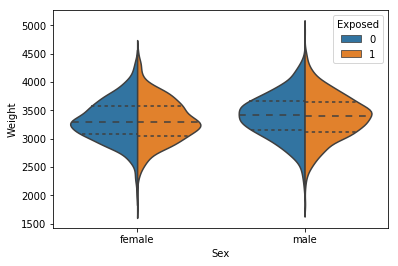

In [30]:
sns.violinplot(x='Sex', y='Weight', hue='Exposed', data=df, 
                   split=True, inner="quart")

 Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classiﬁcation).

Are there other features that could be added to the data or created from existing features?  Which ones?

### Modeling 

### Evaluation

### Deployment